In [1]:
#Libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import scipy
import scipy.stats as scs
import seaborn as sns
import sklearn 
import statsmodels
import statsmodels.formula.api as smf            
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import sys
from datetime import datetime
from dateutil.relativedelta import relativedelta
from itertools import product 
from math import sqrt
from matplotlib import pyplot
from numpy import loadtxt
from pandas import concat
from pandas import DataFrame
from pandas import read_csv
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
from pandas.plotting import scatter_matrix
from scipy.optimize import minimize  
from sklearn import metrics
from sklearn import linear_model as lm
from sklearn import model_selection
from sklearn.datasets import make_regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from statsmodels.graphics.tsaplots import plot_acf
from tqdm import tqdm_notebook

%matplotlib inline

In [2]:
# https://www.kaggle.com/vishakg/predicting-hdd-failures-using-ml
df = pd.read_csv("model_2018_ST4000DM000.csv")

In [3]:
df.shape

(380078, 105)

In [4]:
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2018-01-01,Z3016TK2,ST4000DM000,4000787030016,0,115.0,87117728.0,NaN,NaN,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,W300GLSS,ST4000DM000,4000787030016,1,111.0,40108520.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,Z302SXQ0,ST4000DM000,4000787030016,0,119.0,208926768.0,NaN,NaN,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,Z3025L3F,ST4000DM000,4000787030016,1,111.0,30947064.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,Z302SW9C,ST4000DM000,4000787030016,0,117.0,137764288.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df["serial_number"].value_counts()

S300ZQP6    91
Z30259HF    91
Z304VBWQ    91
Z304KBN4    91
Z3026Z4W    91
            ..
Z305APWM     1
Z305D4XE     1
Z305GXAP     1
Z302DY9G     1
Z305K27V     1
Name: serial_number, Length: 7894, dtype: int64

In [6]:
len(df[df["serial_number"] == 'S301PS3E'])

91

In [7]:
len(df[df["failure"] == 0])

367482

In [8]:
df.tail()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
380073,2018-12-31,S300YCNV,ST4000DM000,4000787030016,0,117.0,144146848.0,NaN,NaN,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
380074,2018-12-31,Z3029G90,ST4000DM000,4000787030016,0,120.0,238155568.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
380075,2018-12-31,Z304VBWQ,ST4000DM000,4000787030016,0,119.0,228301856.0,NaN,NaN,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
380076,2018-12-31,Z3029Z6Q,ST4000DM000,4000787030016,0,113.0,53647936.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
380077,2018-12-31,S301PS3E,ST4000DM000,4000787030016,0,119.0,228126392.0,NaN,NaN,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.columns

Index(['date', 'serial_number', 'model', 'capacity_bytes', 'failure',
       'smart_1_normalized', 'smart_1_raw', 'smart_2_normalized',
       'smart_2_raw', 'smart_3_normalized',
       ...
       'smart_250_normalized', 'smart_250_raw', 'smart_251_normalized',
       'smart_251_raw', 'smart_252_normalized', 'smart_252_raw',
       'smart_254_normalized', 'smart_254_raw', 'smart_255_normalized',
       'smart_255_raw'],
      dtype='object', length=105)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380078 entries, 0 to 380077
Columns: 105 entries, date to smart_255_raw
dtypes: float64(100), int64(2), object(3)
memory usage: 304.5+ MB


In [11]:
df.describe()

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
count,3.800780e+05,380078.000000,380062.000000,3.800620e+05,0.0,0.0,380062.000000,380062.0,380062.000000,380062.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,4.000619e+12,0.033141,115.292818,1.219695e+08,NaN,NaN,93.052452,0.0,99.999687,11.378909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.595736e+10,0.179004,3.875825,7.055956e+07,NaN,NaN,2.203416,0.0,0.017692,22.970384,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.000000e+00,0.000000,93.000000,0.000000e+00,NaN,NaN,91.000000,0.0,99.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.000787e+12,0.000000,114.000000,6.072650e+07,NaN,NaN,91.000000,0.0,100.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.000787e+12,0.000000,117.000000,1.219986e+08,NaN,NaN,92.000000,0.0,100.000000,9.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.000787e+12,0.000000,118.000000,1.830339e+08,NaN,NaN,95.000000,0.0,100.000000,14.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4.000787e+12,1.000000,120.000000,2.441403e+08,NaN,NaN,100.000000,0.0,100.000000,1507.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Drop object datatypes
df.drop(["date","serial_number", "model"], axis=1, inplace=True)

In [13]:
df.dtypes

capacity_bytes            int64
failure                   int64
smart_1_normalized      float64
smart_1_raw             float64
smart_2_normalized      float64
                         ...   
smart_252_raw           float64
smart_254_normalized    float64
smart_254_raw           float64
smart_255_normalized    float64
smart_255_raw           float64
Length: 102, dtype: object

In [14]:
#Check for NAN entries
np.where(np.isnan(df))

(array([     0,      0,      0, ..., 380077, 380077, 380077]),
 array([  4,   5,  14, ...,  99, 100, 101]))

In [15]:
#Use Imputer to fill NAN
#imputer = SimpleImputer(strategy="median")
#imputer.fit(df)
#imputer.transform(df)
#imputer.statistics_
df.fillna(df.median(), inplace=True)

In [16]:
#Correct datatypes of dataset
#df = df.astype({"serial_number": str})
df= df.infer_objects()

In [17]:
#Check imputer strategy
df.median().values

array([4.00078703e+12, 0.00000000e+00, 1.17000000e+02, 1.21998564e+08,
                  nan,            nan, 9.20000000e+01, 0.00000000e+00,
       1.00000000e+02, 9.00000000e+00, 1.00000000e+02, 0.00000000e+00,
       8.40000000e+01, 2.89396494e+08,            nan,            nan,
       7.00000000e+01, 2.66015000e+04, 1.00000000e+02, 0.00000000e+00,
                  nan,            nan, 1.00000000e+02, 9.00000000e+00,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan, 1.00000000e+02, 0.00000000e+00,
       1.00000000e+02, 0.00000000e+00, 1.00000000e+02, 0.00000000e+00,
       1.00000000e+02, 0.00000000e+00, 1.00000000e+02, 0.00000000e+00,
       7.70000000e+01, 2.30000000e+01, 1.00000000e+02, 0.00000000e+00,
       1.00000000e+02, 0.00000000e+00, 8.60000000e+01, 2.96750000e+04,
      

In [18]:
#Drop columns with NaN
df.dropna(axis = 1, inplace = True)

In [20]:
#Clean data
df

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,...,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw,smart_242_normalized,smart_242_raw
0,4000787030016,0,115.0,87117728.0,96.0,0.0,100.0,4.0,100.0,0.0,...,100.0,0.0,200.0,0.0,100.0,33489.0,100.0,2.687128e+10,100.0,1.472861e+11
1,4000787030016,1,111.0,40108520.0,92.0,0.0,100.0,30.0,100.0,0.0,...,100.0,0.0,200.0,0.0,100.0,36807.0,100.0,2.951751e+10,100.0,2.798414e+11
2,4000787030016,0,119.0,208926768.0,94.0,0.0,100.0,6.0,100.0,0.0,...,100.0,0.0,200.0,0.0,100.0,20576.0,100.0,4.515174e+10,100.0,6.711565e+10
3,4000787030016,1,111.0,30947064.0,92.0,0.0,100.0,8.0,100.0,0.0,...,100.0,0.0,200.0,0.0,100.0,28266.0,100.0,2.564620e+10,100.0,2.462911e+11
4,4000787030016,0,117.0,137764288.0,92.0,0.0,100.0,9.0,100.0,0.0,...,100.0,0.0,200.0,0.0,100.0,19868.0,100.0,4.515113e+10,100.0,6.775182e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380073,4000787030016,0,117.0,144146848.0,97.0,0.0,100.0,3.0,100.0,0.0,...,100.0,0.0,200.0,0.0,100.0,29309.0,100.0,5.325772e+10,100.0,1.146175e+11
380074,4000787030016,0,120.0,238155568.0,92.0,0.0,100.0,15.0,100.0,0.0,...,100.0,0.0,200.0,0.0,100.0,34134.0,100.0,2.865361e+10,100.0,2.134394e+11
380075,4000787030016,0,119.0,228301856.0,95.0,0.0,100.0,5.0,100.0,0.0,...,100.0,0.0,200.0,0.0,100.0,25888.0,100.0,4.558440e+10,100.0,1.124560e+11
380076,4000787030016,0,113.0,53647936.0,91.0,0.0,100.0,13.0,100.0,0.0,...,100.0,0.0,200.0,0.0,100.0,34628.0,100.0,2.420425e+10,100.0,2.162542e+11


In [21]:
#Check Correlations
df[["smart_1_normalized","smart_1_raw"]].corr()

,smart_1_normalized,smart_1_raw
smart_1_normalized,1.000000,0.863381
smart_1_raw,0.863381,1.000000


In [22]:
#Check how is an individual column
df["failure"]

0         0
1         1
2         0
3         1
4         0
         ..
380073    0
380074    0
380075    0
380076    0
380077    0
Name: failure, Length: 380078, dtype: int64

In [23]:
#Check repetitions in entries
df["capacity_bytes"].value_counts()

 4000787030016    380062
-1                    16
Name: capacity_bytes, dtype: int64

In [24]:
#Check Correlations among features
df.corr()

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,...,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw,smart_242_normalized,smart_242_raw
capacity_bytes,1.000000,-0.003330,-0.002858,-0.000003,0.003099,NaN,-0.000115,0.000672,-0.000129,0.000130,...,-0.000047,0.000181,NaN,0.000166,NaN,0.000728,NaN,-0.000381,NaN,0.002475
failure,-0.003330,1.000000,-0.003099,0.000371,-0.019900,NaN,0.003276,-0.004203,-0.011970,0.010427,...,-0.037833,0.100509,NaN,-0.004396,NaN,-0.014053,NaN,-0.025407,NaN,0.019758
smart_1_normalized,-0.002858,-0.003099,1.000000,0.863381,-0.000512,NaN,0.001683,-0.001100,0.000868,-0.000900,...,0.001339,-0.002048,NaN,0.001435,NaN,0.000678,NaN,-0.001015,NaN,0.000302
smart_1_raw,-0.000003,0.000371,0.863381,1.000000,-0.000042,NaN,0.001052,-0.000639,-0.001118,0.001090,...,-0.001182,0.001039,NaN,0.000621,NaN,0.000529,NaN,-0.000557,NaN,0.000222
smart_3_normalized,0.003099,-0.019900,-0.000512,-0.000042,1.000000,NaN,-0.002684,-0.208299,0.012941,-0.013482,...,0.001567,-0.006786,NaN,-0.022560,NaN,-0.409789,NaN,0.376793,NaN,-0.465671
smart_3_raw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smart_4_normalized,-0.000115,0.003276,0.001683,0.001052,-0.002684,NaN,1.000000,-0.923132,-0.000352,0.000355,...,-0.000128,0.000493,NaN,0.000453,NaN,-0.004655,NaN,0.018639,NaN,-0.019008
smart_4_raw,0.000672,-0.004203,-0.001100,-0.000639,-0.208299,NaN,-0.923132,1.000000,-0.010969,0.011158,...,-0.000043,0.000522,NaN,0.017122,NaN,0.186060,NaN,-0.142760,NaN,0.229249
smart_5_normalized,-0.000129,-0.011970,0.000868,-0.001118,0.012941,NaN,-0.000352,-0.010969,1.000000,-0.999275,...,0.070158,-0.086555,NaN,0.000506,NaN,-0.018314,NaN,0.008814,NaN,-0.006839
smart_5_raw,0.000130,0.010427,-0.000900,0.001090,-0.013482,NaN,0.000355,0.011158,-0.999275,1.000000,...,-0.071198,0.087372,NaN,-0.000511,NaN,0.018765,NaN,-0.008877,NaN,0.007615


<AxesSubplot:>

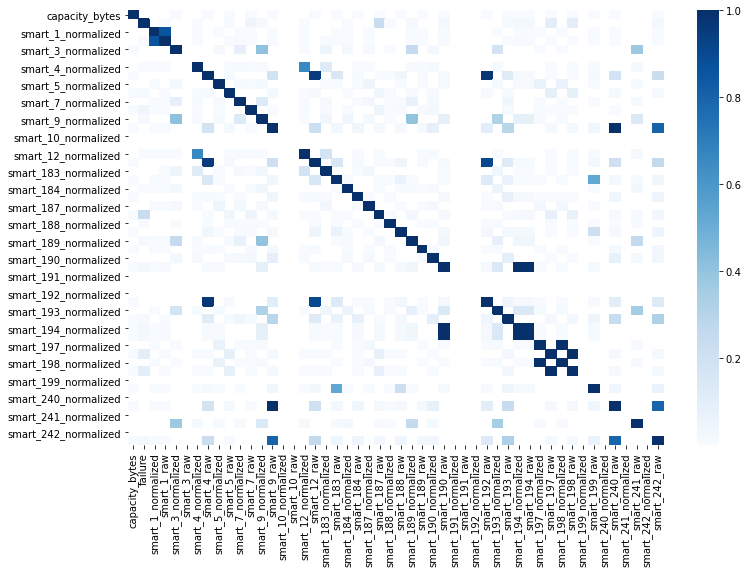

In [25]:
corr = df.corr()

kot = corr[corr >= 0]
plt.figure(figsize = (12,8))
sns.heatmap(kot, cmap="Blues", annot = False)

array([[<AxesSubplot:title={'center':'capacity_bytes'}>,
        <AxesSubplot:title={'center':'failure'}>,
        <AxesSubplot:title={'center':'smart_1_normalized'}>,
        <AxesSubplot:title={'center':'smart_1_raw'}>,
        <AxesSubplot:title={'center':'smart_3_normalized'}>,
        <AxesSubplot:title={'center':'smart_3_raw'}>,
        <AxesSubplot:title={'center':'smart_4_normalized'}>],
       [<AxesSubplot:title={'center':'smart_4_raw'}>,
        <AxesSubplot:title={'center':'smart_5_normalized'}>,
        <AxesSubplot:title={'center':'smart_5_raw'}>,
        <AxesSubplot:title={'center':'smart_7_normalized'}>,
        <AxesSubplot:title={'center':'smart_7_raw'}>,
        <AxesSubplot:title={'center':'smart_9_normalized'}>,
        <AxesSubplot:title={'center':'smart_9_raw'}>],
       [<AxesSubplot:title={'center':'smart_10_normalized'}>,
        <AxesSubplot:title={'center':'smart_10_raw'}>,
        <AxesSubplot:title={'center':'smart_12_normalized'}>,
        <AxesSubplot:t

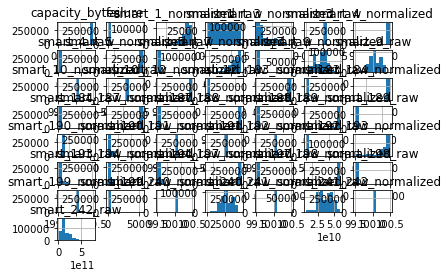

In [26]:
df.hist()

In [27]:
#I choose predictable feature to be failure
#I devide features x and variable y
x = df.drop("failure", axis=1)
y = df["failure"]

In [28]:
y

0         0
1         1
2         0
3         1
4         0
         ..
380073    0
380074    0
380075    0
380076    0
380077    0
Name: failure, Length: 380078, dtype: int64

In [29]:
x

,capacity_bytes,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,...,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw,smart_242_normalized,smart_242_raw
0,4000787030016,115.0,87117728.0,96.0,0.0,100.0,4.0,100.0,0.0,89.0,...,100.0,0.0,200.0,0.0,100.0,33489.0,100.0,2.687128e+10,100.0,1.472861e+11
1,4000787030016,111.0,40108520.0,92.0,0.0,100.0,30.0,100.0,0.0,81.0,...,100.0,0.0,200.0,0.0,100.0,36807.0,100.0,2.951751e+10,100.0,2.798414e+11
2,4000787030016,119.0,208926768.0,94.0,0.0,100.0,6.0,100.0,0.0,90.0,...,100.0,0.0,200.0,0.0,100.0,20576.0,100.0,4.515174e+10,100.0,6.711565e+10
3,4000787030016,111.0,30947064.0,92.0,0.0,100.0,8.0,100.0,0.0,85.0,...,100.0,0.0,200.0,0.0,100.0,28266.0,100.0,2.564620e+10,100.0,2.462911e+11
4,4000787030016,117.0,137764288.0,92.0,0.0,100.0,9.0,100.0,0.0,90.0,...,100.0,0.0,200.0,0.0,100.0,19868.0,100.0,4.515113e+10,100.0,6.775182e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380073,4000787030016,117.0,144146848.0,97.0,0.0,100.0,3.0,100.0,0.0,87.0,...,100.0,0.0,200.0,0.0,100.0,29309.0,100.0,5.325772e+10,100.0,1.146175e+11
380074,4000787030016,120.0,238155568.0,92.0,0.0,100.0,15.0,100.0,0.0,83.0,...,100.0,0.0,200.0,0.0,100.0,34134.0,100.0,2.865361e+10,100.0,2.134394e+11
380075,4000787030016,119.0,228301856.0,95.0,0.0,100.0,5.0,100.0,0.0,84.0,...,100.0,0.0,200.0,0.0,100.0,25888.0,100.0,4.558440e+10,100.0,1.124560e+11
380076,4000787030016,113.0,53647936.0,91.0,0.0,100.0,13.0,100.0,0.0,84.0,...,100.0,0.0,200.0,0.0,100.0,34628.0,100.0,2.420425e+10,100.0,2.162542e+11


In [30]:
#I split data for ML training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [31]:
#Feature Selection using Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier() 
rfc.fit(x_train, y_train) 
yPred = rfc.predict(x_test)

Text(0.5, 0, 'Feature importance using Random Forest Classifier')

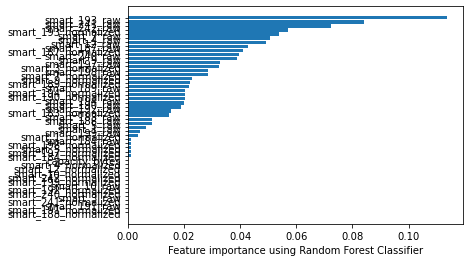

In [32]:
sorted_idx = rfc.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx], rfc.feature_importances_[sorted_idx])
plt.xlabel("Feature importance using Random Forest Classifier")

In [33]:
#Top features
#Saving sorted features
df_imp = pd.DataFrame({'Feature': x.columns, 'Importance': rfc.feature_importances_}) \
    .sort_values('Importance', ascending = False).reset_index(drop = True)

In [34]:
df_imp 

,Feature,Importance
0,smart_193_raw,0.113538
1,smart_241_raw,0.084219
2,smart_242_raw,0.072451
3,smart_193_normalized,0.057168
4,smart_7_raw,0.053979
5,smart_4_raw,0.050465
6,smart_12_raw,0.049155
7,smart_187_raw,0.042943
8,smart_187_normalized,0.041025
9,smart_240_raw,0.039460


In [35]:
#Results of our predictions

from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 

In [36]:
acc = accuracy_score(y_test, yPred) 
print("The accuracy is {}".format(acc)) 

The accuracy is 0.99930277836245


In [37]:
prec = precision_score(y_test, yPred) 
print("The precision is {}".format(prec))

The precision is 1.0


In [38]:
rec = recall_score(y_test, yPred) 
print("The recall is {}".format(rec)) 

The recall is 0.9791502753737215


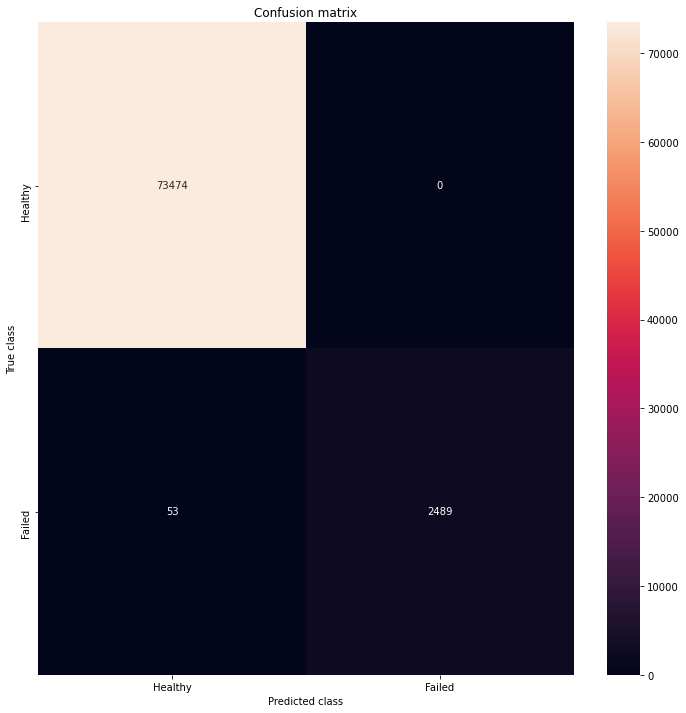

In [39]:
 # confusion matrix 

LABELS = ['Healthy', 'Failed'] 
conf_matrix = confusion_matrix(y_test, yPred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In [40]:
#Select top 3 features
x = x[['smart_193_raw', 'smart_241_raw', 'smart_242_raw']]

In [41]:
x

,smart_193_raw,smart_241_raw,smart_242_raw
0,4579.0,2.687128e+10,1.472861e+11
1,61458.0,2.951751e+10,2.798414e+11
2,20677.0,4.515174e+10,6.711565e+10
3,10785.0,2.564620e+10,2.462911e+11
4,10574.0,4.515113e+10,6.775182e+10
...,...,...,...
380073,19724.0,5.325772e+10,1.146175e+11
380074,68190.0,2.865361e+10,2.134394e+11
380075,8814.0,4.558440e+10,1.124560e+11
380076,28331.0,2.420425e+10,2.162542e+11


In [46]:
#Check prediction
rfc.predict(x_test.iloc[28:29,:])

array([1])

In [43]:
y_test.head(30)

240987    0
106096    0
11732     0
300640    0
212848    0
113838    0
294865    0
355004    0
21232     0
63361     0
322963    0
64545     0
363822    0
317630    0
27940     0
226178    0
57375     0
217531    0
71416     0
220842    0
287824    0
244594    0
81726     0
280381    0
149014    0
214825    0
26039     0
261308    0
17104     1
238246    0
Name: failure, dtype: int64